In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 1. Create a new file named model_evaluation.py or model_evaluation.ipynb for these exercises.

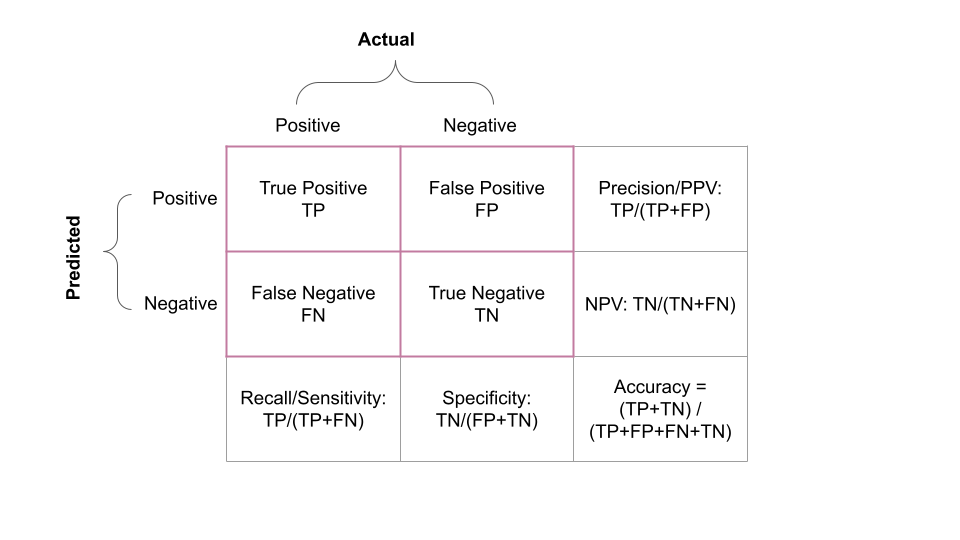

## 2. Given the following confusion matrix, evaluate (by hand) the model's performance.

|               | actual dog | actual cat |
|:------------  |-----------:|-----------:|
| predicted dog |         46 |         13 |
| predicted cat |          7 |         34 |

#### For this problem we will make dog positive.

- In the context of this problem, what is a false positive?

In [2]:
# For this question a false positive is when we predict a dog, but in actuality it is a cat (13)

- In the context of this problem, what is a false negative?

In [3]:
# A false negative is when we predict a cat but in actuality it is a dog (7)

- How would you describe this model?

In [4]:
print(f'Model accuracy is {(46+34)/(46+13+7+34) * 100}%') # Given a prediction, how much do we trust that prediction?
print(f'Model PPV is {round(46/(46+13)*100, 2)}%') # Given a positive prediction, how much do we trust that prediction?
print(f'Model NPV is {round(34/(34+7)*100,2)}%') # Given a negative prediction, how much do we trust that negative prediction?
print(f'Model Recall(Sensitivity) is {round(46/(46+7)*100, 2)}%') # How well is this model minimizing false negatives?
print(f'Model Specificity is {round(34/(34+13)*100,2)}%') # How well is this model minimizing false positives? 

Model accuracy is 80.0%
Model PPV is 77.97%
Model NPV is 82.93%
Model Recall(Sensitivity) is 86.79%
Model Specificity is 72.34%


## 3. You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.

#### Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here: https://ds.codeup.com/data/c3.csv.

In [5]:
c3 = pd.read_csv('https://ds.codeup.com/data/c3.csv')
c3

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect
...,...,...,...,...
195,No Defect,No Defect,Defect,Defect
196,Defect,Defect,No Defect,No Defect
197,No Defect,No Defect,No Defect,No Defect
198,No Defect,No Defect,Defect,Defect


## For this case we will assign a defect as being a positive 

In [6]:
pd.crosstab(c3.model1, c3.actual)

actual,Defect,No Defect
model1,,
Defect,8,2
No Defect,8,182


In [7]:
pd.crosstab(c3.model2, c3.actual)

actual,Defect,No Defect
model2,,
Defect,9,81
No Defect,7,103


In [8]:
pd.crosstab(c3.model3, c3.actual)

actual,Defect,No Defect
model3,,
Defect,13,86
No Defect,3,98


### Use the predictions dataset and pandas to help answer the following questions:

#### - An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

In [9]:
pd.DataFrame(classification_report(c3.actual, c3.model1, output_dict=True))

,Defect,No Defect,accuracy,macro avg,weighted avg
precision,0.800000,0.957895,0.95,0.878947,0.945263
recall,0.500000,0.989130,0.95,0.744565,0.950000
f1-score,0.615385,0.973262,0.95,0.794323,0.944632
support,16.000000,184.000000,0.95,200.000000,200.000000


In [10]:
pd.DataFrame(classification_report(c3.actual, c3.model2, output_dict=True))

,Defect,No Defect,accuracy,macro avg,weighted avg
precision,0.100000,0.936364,0.56,0.518182,0.869455
recall,0.562500,0.559783,0.56,0.561141,0.560000
f1-score,0.169811,0.700680,0.56,0.435246,0.658211
support,16.000000,184.000000,0.56,200.000000,200.000000


In [11]:
pd.DataFrame(classification_report(c3.actual, c3.model3, output_dict=True))

,Defect,No Defect,accuracy,macro avg,weighted avg
precision,0.131313,0.970297,0.555,0.550805,0.903178
recall,0.812500,0.532609,0.555,0.672554,0.555000
f1-score,0.226087,0.687719,0.555,0.456903,0.650789
support,16.000000,184.000000,0.555,200.000000,200.000000


 For this question the Recall metric would be best, the reason being because it will tell us how acurately the model correctly predicted when a duck would have a defect. With model 3 having the highest recall rate for defect,  model 3 will be best model for this question.

#### - Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

The PR team wants to minimize False positives (where the prediction is that the duck was defective, but the duck was actually good). So specificity would be the best metric to use.

In [12]:
print('How well is this model minimizing false positives?')
print(f'Model1 Specificity is {round(182/(2+182)*100,2)}%')
print(f'Model2 Specificity is {round(103/(81+103)*100,2)}%')
print(f'Model3 Specificity is {round(98/(86+98)*100,2)}%')

How well is this model minimizing false positives?
Model1 Specificity is 98.91%
Model2 Specificity is 55.98%
Model3 Specificity is 53.26%


Model1 would be best for this question, because model1's specificity is much higher than model2 or model3's. Meaning it allows for less false positves to go undetected.

## 4. You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).
- At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

-Several models have already been developed with the data, and you can find their results here: https://ds.codeup.com/data/gives_you_paws.csv.

### Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:

In [13]:
df = pd.read_csv('https://ds.codeup.com/data/gives_you_paws.csv')
df

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog
...,...,...,...,...,...
4995,dog,dog,dog,dog,dog
4996,dog,dog,cat,cat,dog
4997,dog,cat,cat,dog,dog
4998,cat,cat,cat,cat,dog


#### - In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?

In [14]:
#First we need to find out what our baseline is (it will most commonly be the mode, so we will use that here)
df.actual.value_counts()

dog    3254
cat    1746
Name: actual, dtype: int64

In [15]:
#Now that we have our baseline, it is time to find the baselines accuracy.

baseline_accuracy = (df.actual == 'dog').mean()
print(f'The baseline accuracy is {baseline_accuracy * 100}%')

The baseline accuracy is 65.08%


In [22]:
#all models accuracy
model_acc = []

for model in df.columns[1:]:
    acc = (df.actual == df[model]).mean()
    model_acc.append([model, acc])

model_acc

[['model1', 0.8074],
 ['model2', 0.6304],
 ['model3', 0.5096],
 ['model4', 0.7426]]

In [23]:
#make pretty in df
pd.DataFrame(model_acc, columns=['model','accuracy'])

,model,accuracy
0,model1,0.8074
1,model2,0.6304
2,model3,0.5096
3,model4,0.7426


In [20]:
# Model 1 has the highest accuracy at 80.74%
# Model 4 has the next highest accuracy at 74.26%
# Model 2 & 3 performed worse than the baseline

#### - Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? For Phase II?

### Model 1
|               | actual dog | actual cat |
|:------------  |-----------:|-----------:|
| predicted dog |       2614 |        323 |
| predicted cat |        640 |       1423 |

### Model 2
|               | actual dog | actual cat |
|:------------  |-----------:|-----------:|
| predicted dog |       1597 |        191 |
| predicted cat |       1657 |       1555 |

### Model 3
|               | actual dog | actual cat |
|:------------  |-----------:|-----------:|
| predicted dog |       1655 |        853 |
| predicted cat |       1599 |        893 |

### Model 4
|               | actual dog | actual cat |
|:------------  |-----------:|-----------:|
| predicted dog |       3110 |       1143 |
| predicted cat |        144 |        603 |

- Dog will be positive

- Cat wil be negative

In [28]:
#calculate for all models
model_precision = []

for model in df.columns[1:]:
    
    subset = df [df[model] == 'dog']
    
    precision = (subset.actual == subset[model]).mean()

    model_precision.append([model,precision])
    
model_pre

[['model1', 0.8900238338440586],
 ['model2', 0.8931767337807607],
 ['model3', 0.6598883572567783],
 ['model4', 0.7312485304490948]]

With model 2 having the highest precision we can say that model 2 will minimize the false positves


#### - Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?

- Cat will be positive

- Dog wil be negative

In [32]:
#calculate for all models
model_pre = []

for model in df.columns[1:]:
    
    subset = df [df[model] == 'cat']
    
    precision = (subset.actual == subset[model]).mean()

    model_pre.append([model,precision])
    
model_pre

[['model1', 0.6897721764420747],
 ['model2', 0.4841220423412204],
 ['model3', 0.358346709470305],
 ['model4', 0.8072289156626506]]

With model 4 having the highest precision we can say that model 4 will minimize the false positves

## Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem.

- sklearn.metrics.accuracy_score
- sklearn.metrics.precision_score
- sklearn.metrics.recall_score
- sklearn.metrics.classification_report

In [38]:
print("Model 1")
pd.DataFrame(classification_report(df.actual, df.model1, 
                      labels=['dog','cat'],
                      output_dict=True))

Model 1


,dog,cat,accuracy,macro avg,weighted avg
precision,0.890024,0.689772,0.8074,0.789898,0.820096
recall,0.803319,0.815006,0.8074,0.809162,0.807400
f1-score,0.844452,0.747178,0.8074,0.795815,0.810484
support,3254.000000,1746.000000,0.8074,5000.000000,5000.000000


In [39]:
print("Model 2")
pd.DataFrame(classification_report(df.actual, df.model2, 
                      labels=['dog','cat'],
                      output_dict=True))

Model 2


,dog,cat,accuracy,macro avg,weighted avg
precision,0.893177,0.484122,0.6304,0.688649,0.750335
recall,0.490781,0.890607,0.6304,0.690694,0.630400
f1-score,0.633479,0.627269,0.6304,0.630374,0.631310
support,3254.000000,1746.000000,0.6304,5000.000000,5000.000000


In [40]:
print("Model 3")
pd.DataFrame(classification_report(df.actual, df.model3, 
                      labels=['dog','cat'],
                      output_dict=True))

Model 3


,dog,cat,accuracy,macro avg,weighted avg
precision,0.659888,0.358347,0.5096,0.509118,0.554590
recall,0.508605,0.511455,0.5096,0.510030,0.509600
f1-score,0.574453,0.421425,0.5096,0.497939,0.521016
support,3254.000000,1746.000000,0.5096,5000.000000,5000.000000


In [41]:
print("Model 4")
pd.DataFrame(classification_report(df.actual, df.model4, 
                      labels=['dog','cat'],
                      output_dict=True))

Model 4


,dog,cat,accuracy,macro avg,weighted avg
precision,0.731249,0.807229,0.7426,0.769239,0.757781
recall,0.955747,0.345361,0.7426,0.650554,0.742600
f1-score,0.828560,0.483755,0.7426,0.656157,0.708154
support,3254.000000,1746.000000,0.7426,5000.000000,5000.000000
